In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [3]:
df2 = df1.copy()

In [4]:
df2.drop(['area_type', 'availability', 'location','society','balcony'], axis= 1, inplace=True)

In [5]:
df2.isnull().sum()

size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df2['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [8]:
#As the most of the size of a hosue is 2 BHK to replace the null value as 2 BHK
df2['size'].fillna('2 BHK', inplace=True)

In [13]:
#And fill na null value of bath as median
df2['bath'].fillna(df2['bath'].median(), inplace=True)
df2['bath'].isnull().sum()

0

In [14]:
df2.drop('bedroom', inplace=True, axis=1)

In [15]:
df2.head()

,size,total_sqft,bath,price
0,2 BHK,1056,2.0,39.07
1,4 Bedroom,2600,5.0,120.00
2,3 BHK,1440,2.0,62.00
3,3 BHK,1521,3.0,95.00
4,2 BHK,1200,2.0,51.00


In [20]:
df2['bedroom'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [21]:
df2.head()

,size,total_sqft,bath,price,bedroom
0,2 BHK,1056,2.0,39.07,2
1,4 Bedroom,2600,5.0,120.00,4
2,3 BHK,1440,2.0,62.00,3
3,3 BHK,1521,3.0,95.00,3
4,2 BHK,1200,2.0,51.00,2


In [22]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def convert_range_into_float(x):
    value = x.split('-')
    if len(value)==2:
        new_value = (float(value[0]) + float(value[1]))/2
        return new_value
    try:
        return float(x)
    except:
        return None
        

In [92]:
convert_range_into_float('34.46Sq. Meter')


In [87]:
df2.isnull().sum()

size               0
total_sqft        46
bath               0
price              0
bedroom            0
price_per_sqft    46
dtype: int64

In [25]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_range_into_float)

In [26]:
df2['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [27]:
df2['total_sqft'].dtype

dtype('float64')

In [28]:
df2.head()

,size,total_sqft,bath,price,bedroom
0,2 BHK,1056.0,2.0,39.07,2
1,4 Bedroom,2600.0,5.0,120.00,4
2,3 BHK,1440.0,2.0,62.00,3
3,3 BHK,1521.0,3.0,95.00,3
4,2 BHK,1200.0,2.0,51.00,2


In [29]:
#Find the value of price_per_sqft
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']

In [30]:
df2.head()

,size,total_sqft,bath,price,bedroom,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,2,4250.000000


**As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [32]:
df2[df2['total_sqft']/df2['bedroom']>300]

,size,total_sqft,bath,price,bedroom,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [39]:
df3 = df2[~(df2['total_sqft']/df2['bedroom']>300)]

In [40]:
 df2[~(df2['total_sqft']/df2['bedroom']>300)]

,size,total_sqft,bath,price,bedroom,price_per_sqft
9,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13281,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13300,5 Bedroom,1500.0,6.0,145.0,5,9666.666667
13303,5 Bedroom,774.0,5.0,70.0,5,9043.927649
13306,4 Bedroom,1200.0,5.0,325.0,4,27083.333333


In [42]:
df2.shape

(13320, 6)

In [44]:
df3.head()

,size,total_sqft,bath,price,bedroom,price_per_sqft
9,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [38]:
#df2[((df2['total_sqft']/df2['bedroom'])>=300)]

,size,total_sqft,bath,price,bedroom,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [47]:
df2[~(df2.total_sqft/df2.bedroom<300)]

,size,total_sqft,bath,price,bedroom,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,4 BHK,4689.0,4.0,488.00,4,10407.336319


**Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely**

In [48]:
df2.shape

(13320, 6)

In [49]:
df4 = df2[~(df2.total_sqft/df2.bedroom<300)]

In [50]:
df4.shape

(12576, 6)

Text(0, 0.5, 'Count')

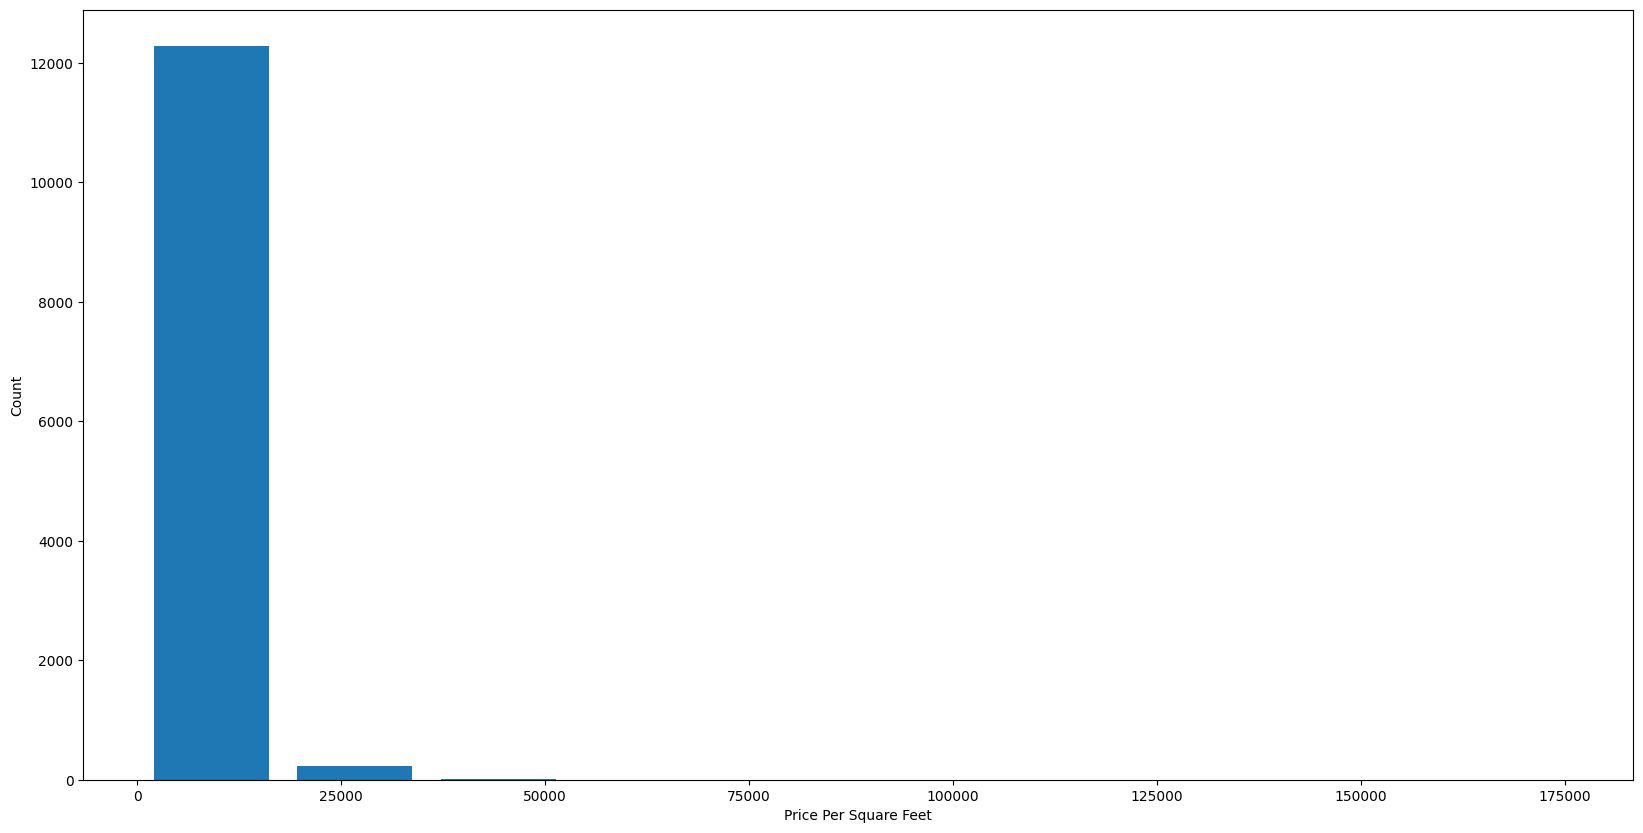

In [52]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Outlier Removal Using Bathrooms Feature

In [54]:
df4['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 14., 12., 16., 10.,
       13.])

Text(0, 0.5, 'Count')

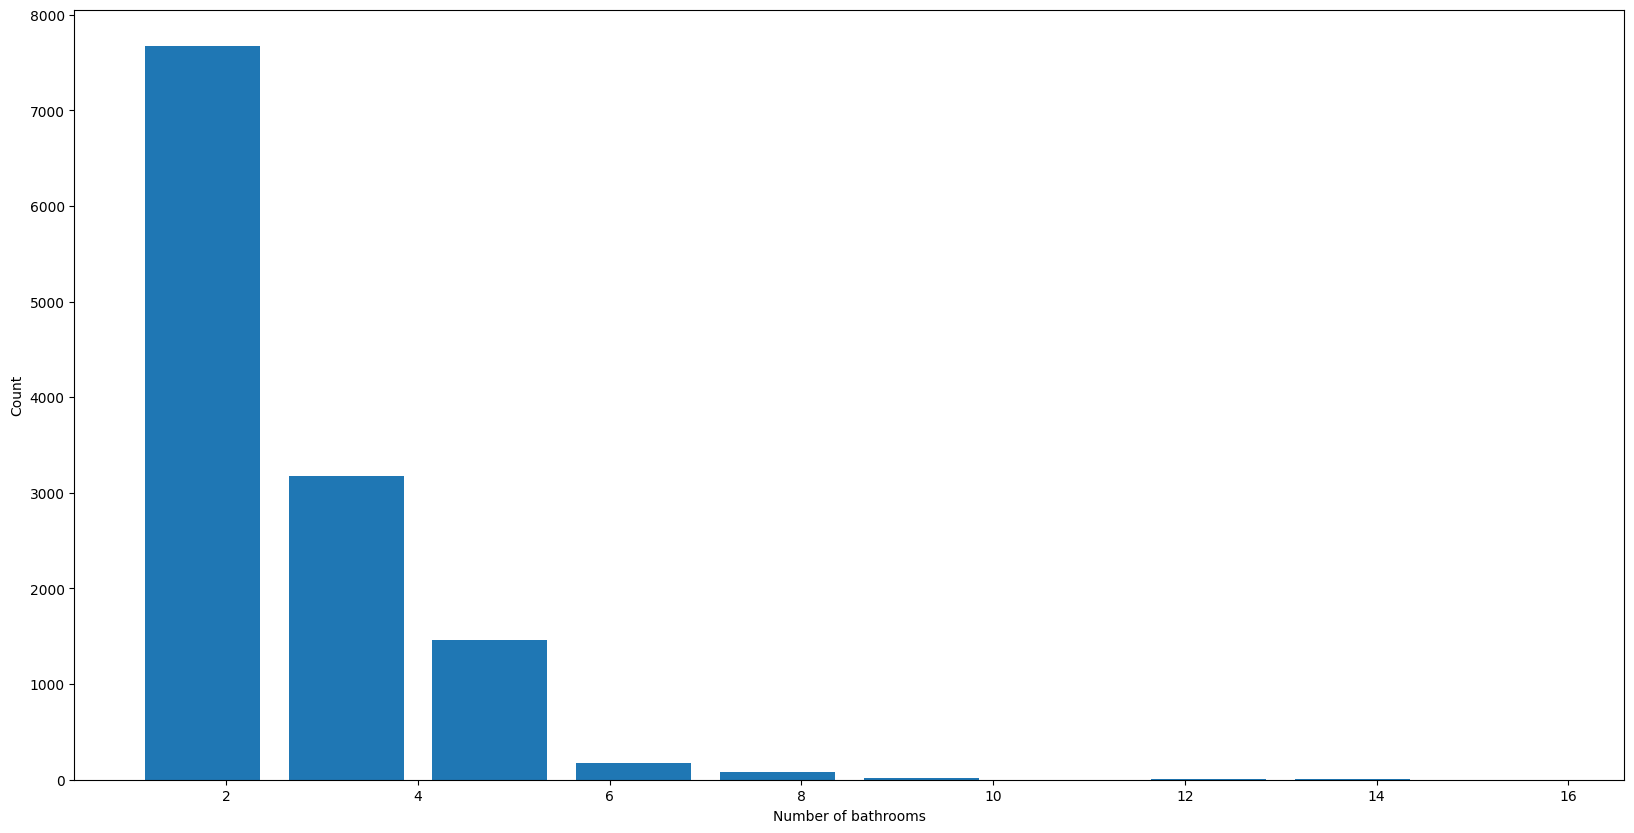

In [55]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [56]:
df4[df4['bath']>10]

,size,total_sqft,bath,price,bedroom,price_per_sqft
1078,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
3096,10 BHK,12000.0,12.0,525.0,10,4375.000000
3609,16 BHK,10000.0,16.0,550.0,16,5500.000000
7979,11 BHK,6000.0,12.0,150.0,11,2500.000000
8636,10 BHK,4000.0,12.0,160.0,10,4000.000000
9935,13 BHK,5425.0,13.0,275.0,13,5069.124424
13067,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350


**It is unusual to have 2 more bathrooms than number of bedrooms in a home**

In [57]:
df4[df4['bath']>df4['bedroom']+2]

,size,total_sqft,bath,price,bedroom,price_per_sqft
1078,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
2620,6 BHK,11338.0,9.0,1000.0,6,8819.897689
6838,5 BHK,7500.0,8.0,1700.0,5,22666.666667
7709,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
9974,3 Bedroom,2400.0,6.0,775.0,3,32291.666667
11366,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
12103,3 BHK,1806.0,6.0,116.0,3,6423.034330
12443,4 Bedroom,4350.0,8.0,2600.0,4,59770.114943
13067,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350


In [63]:
df4.shape

(12576, 6)

**Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed**

In [102]:
df5 = df4[df4['bath']<df4['bedroom']+2]
df5.shape
df5.isnull().sum()

size               0
total_sqft        46
bath               0
price              0
bedroom            0
price_per_sqft    46
dtype: int64

In [61]:
#df4[~(df4['bath']>df4['bedroom']+2)]

In [66]:
df6 = df5.copy()

In [67]:
df6.columns

Index(['size', 'total_sqft', 'bath', 'price', 'bedroom', 'price_per_sqft'], dtype='object')

In [68]:
df6.head(2)

,size,total_sqft,bath,price,bedroom,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,4,4615.384615


In [69]:
df6.drop(['size','price_per_sqft'], axis= 1, inplace=True)

In [84]:
df6.head(2)
df6.info()
#df6.isnull().sum()
df6[df6['total_sqft']== 'NaN']

<class 'pandas.core.frame.DataFrame'>
Index: 12423 entries, 0 to 13319
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_sqft  12377 non-null  float64
 1   bath        12423 non-null  float64
 2   price       12423 non-null  float64
 3   bedroom     12423 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 485.3 KB


,total_sqft,bath,price,bedroom


In [86]:
df6['total_sqft'].unique

<bound method Series.unique of 0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 12423, dtype: float64>

In [104]:
df6.shape

(12423, 4)

In [105]:
df6['total_sqft'].dropna()
df6.isnull().sum()

total_sqft    12423
bath              0
price             0
bedroom           0
dtype: int64

In [80]:
X = df6.drop(['price'], axis= 1)
X.shape
X.isnull().sum()

total_sqft    46
bath           0
bedroom        0
dtype: int64

In [76]:
y = df6['price']

In [77]:
y.shape

(12423,)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [79]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
237

You have a couple of options.

import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(10,6))
# Make a few areas have NaN values
df.iloc[1:3,1] = np.nan
df.iloc[5,3] = np.nan
df.iloc[7:9,5] = np.nan

In [90]:
import numpy as np

In [91]:
df6['total_sqft'] = np.nan

In [93]:
df7 = df6.dropna()

In [96]:
df7.isnull().sum()
df7.shape

(0, 4)

In [95]:
X_1 = df7.drop(['price'], axis= 1)
X_1.shape


(0, 3)

In [97]:
df6.shape

(12423, 4)

In [106]:
df6.isnull().sum()


total_sqft    12423
bath              0
price             0
bedroom           0
dtype: int64

In [101]:
df2.isnull().sum()

size               0
total_sqft        46
bath               0
price              0
bedroom            0
price_per_sqft    46
dtype: int64

In [107]:

df5.isna().any()[lambda x: x]

total_sqft        True
price_per_sqft    True
dtype: bool

In [108]:
df5.columns[df5.isnull().any()].tolist()

['total_sqft', 'price_per_sqft']

In [109]:
df5.loc[:, df5.isnull().any()]

,total_sqft,price_per_sqft
0,1056.0,3699.810606
1,2600.0,4615.384615
2,1440.0,4305.555556
3,1521.0,6245.890861
4,1200.0,4250.000000
...,...,...
13315,3453.0,6689.834926
13316,3600.0,11111.111111
13317,1141.0,5258.545136
13318,4689.0,10407.336319


In [111]:
f = df5.copy()
f.isnull().sum()

size               0
total_sqft        46
bath               0
price              0
bedroom            0
price_per_sqft    46
dtype: int64

In [112]:
h = f.dropna()

In [113]:
h.isnull().sum()

size              0
total_sqft        0
bath              0
price             0
bedroom           0
price_per_sqft    0
dtype: int64

In [114]:
h.shape

(12377, 6)

In [115]:
h.columns

Index(['size', 'total_sqft', 'bath', 'price', 'bedroom', 'price_per_sqft'], dtype='object')

In [116]:
h.drop(['size','price_per_sqft'], axis=1, inplace=True )

C:\Users\Manas\AppData\Local\Temp\ipykernel_27920\345513700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h.drop(['size','price_per_sqft'], axis=1, inplace=True )


In [117]:
h.shape

(12377, 4)

In [118]:
X_2 = h.drop(['price'], axis=1)

In [119]:
X_2.shape

(12377, 3)

In [120]:
X_2.isnull().sum()

total_sqft    0
bath          0
bedroom       0
dtype: int64

In [121]:
y_2 = h['price']
y_2.shape

(12377,)

In [122]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2,test_size=0.2,random_state=10)

In [123]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train_2,y_train_2)
lr_clf.score(X_test_2,y_test_2)

0.24649572013556464

In [124]:
df8 = df5.copy()

In [125]:
df8.shape

(12423, 6)

In [126]:
df_num = df8[['bath','price']]

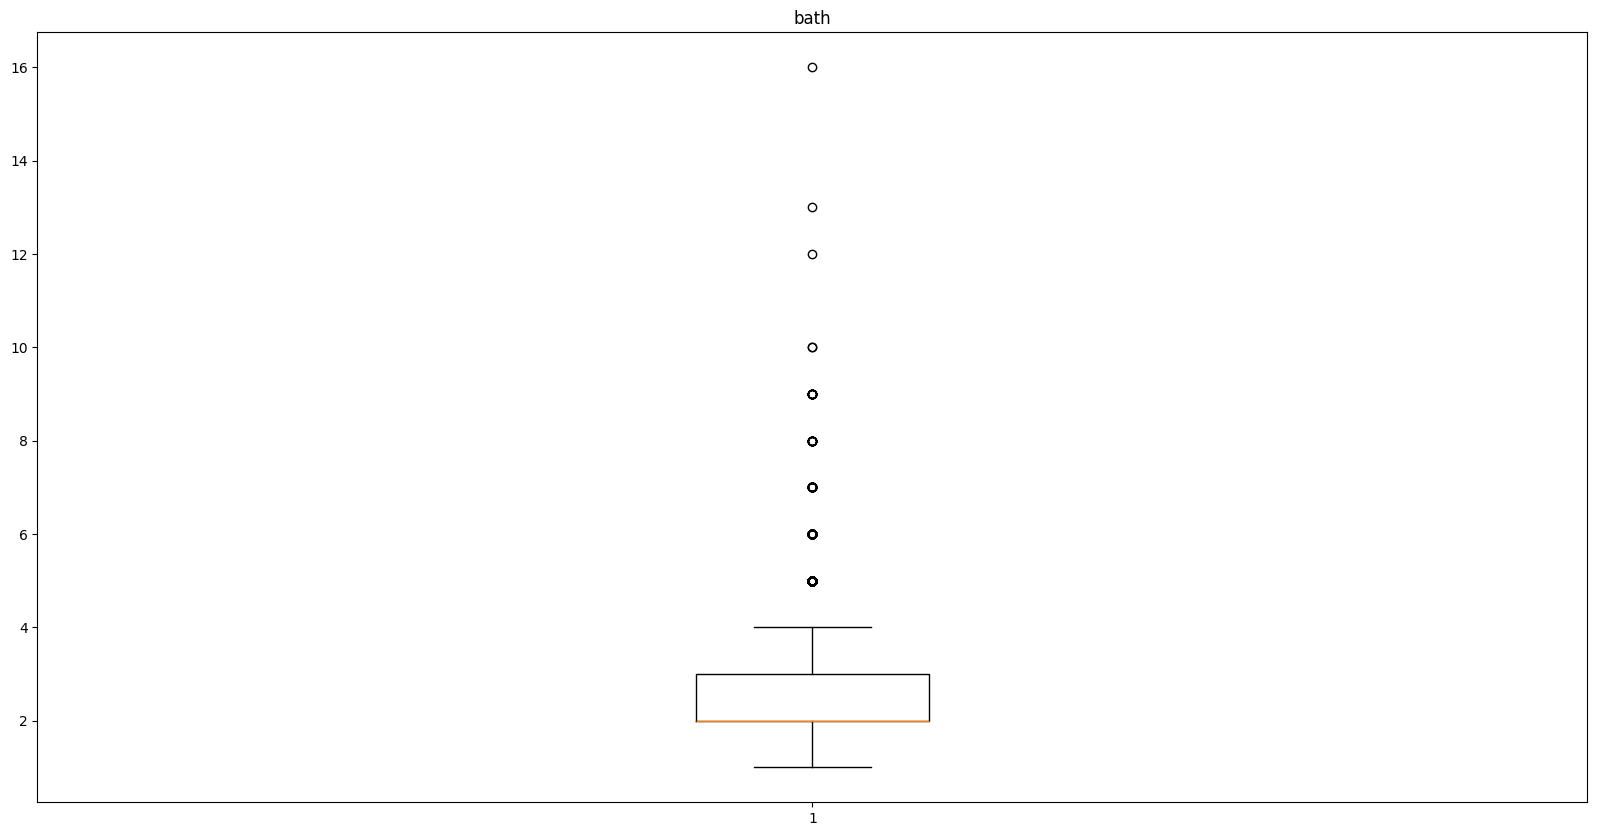

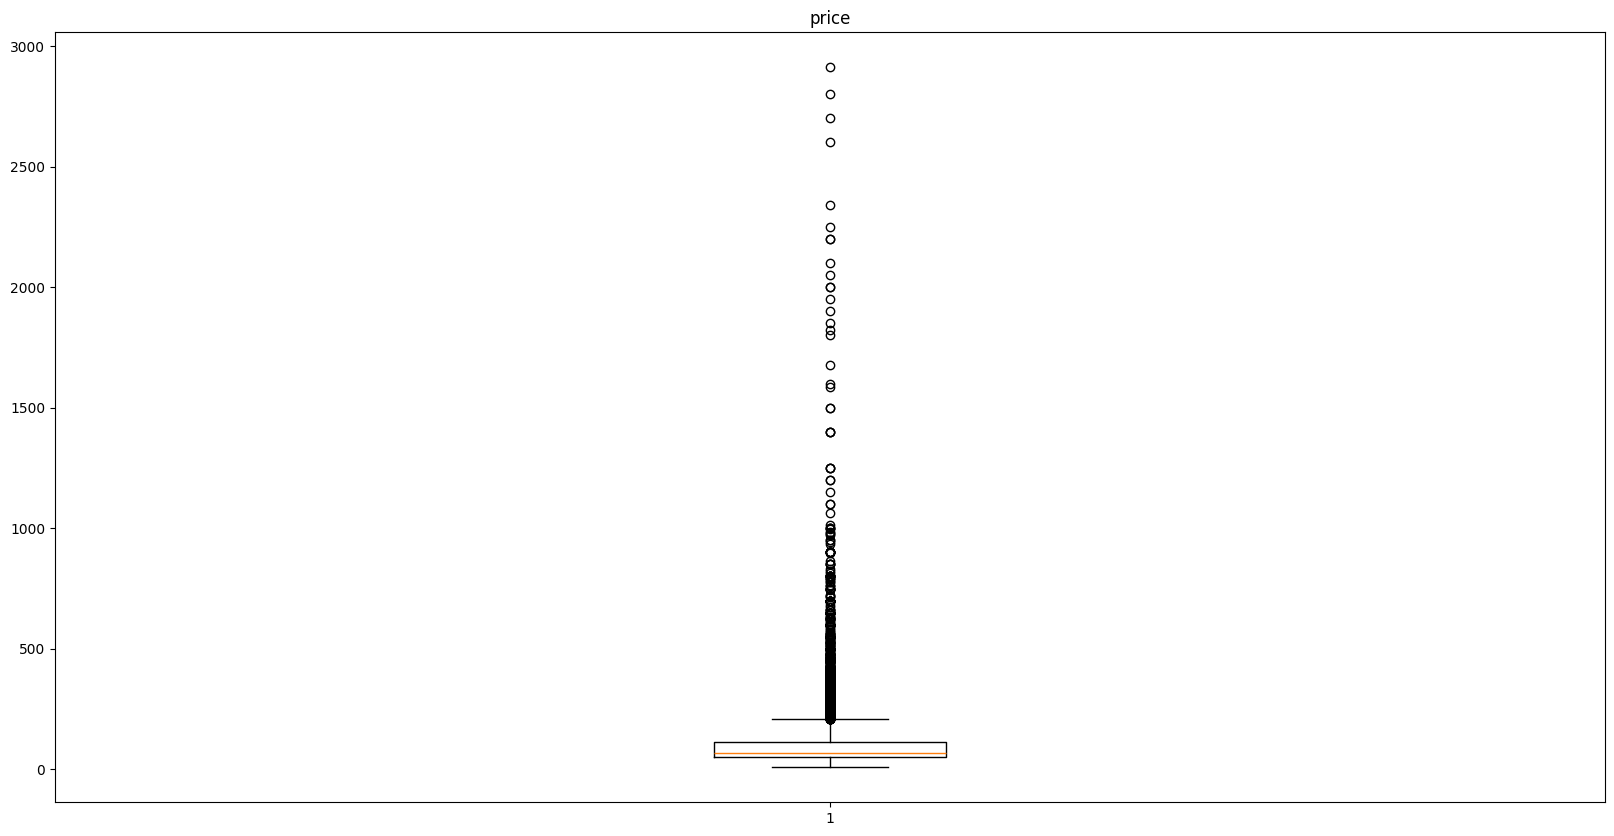

In [127]:
# Checking the outliers
for i in df_num.columns:
    plt.boxplot(df_num[i])
    plt.title(i)
    plt.show()

In [128]:
# For removing the outliers we used IQR method

q_low = df8["total_sqft"].quantile(0.1) 
q_hi  = df8["total_sqft"].quantile(0.9) 
 
df_filtered = df8[(df8["total_sqft"] < q_hi) & (df8["total_sqft"] > q_low)] 
df_filtered 
 
q_low = df8["price"].quantile(0.1) 
q_hi  = df8["price"].quantile(0.9) 
 
df_filtered = df8[(df8["price"] < q_hi) & (df8["price"] > q_low)] 
df8 = df_filtered
df8

,size,total_sqft,bath,price,bedroom,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13310,2 BHK,1050.0,2.0,52.71,2,5020.000000
13312,2 BHK,1262.0,2.0,47.00,2,3724.247227
13313,3 BHK,1345.0,2.0,57.00,3,4237.918216
13314,3 BHK,1715.0,3.0,112.00,3,6530.612245


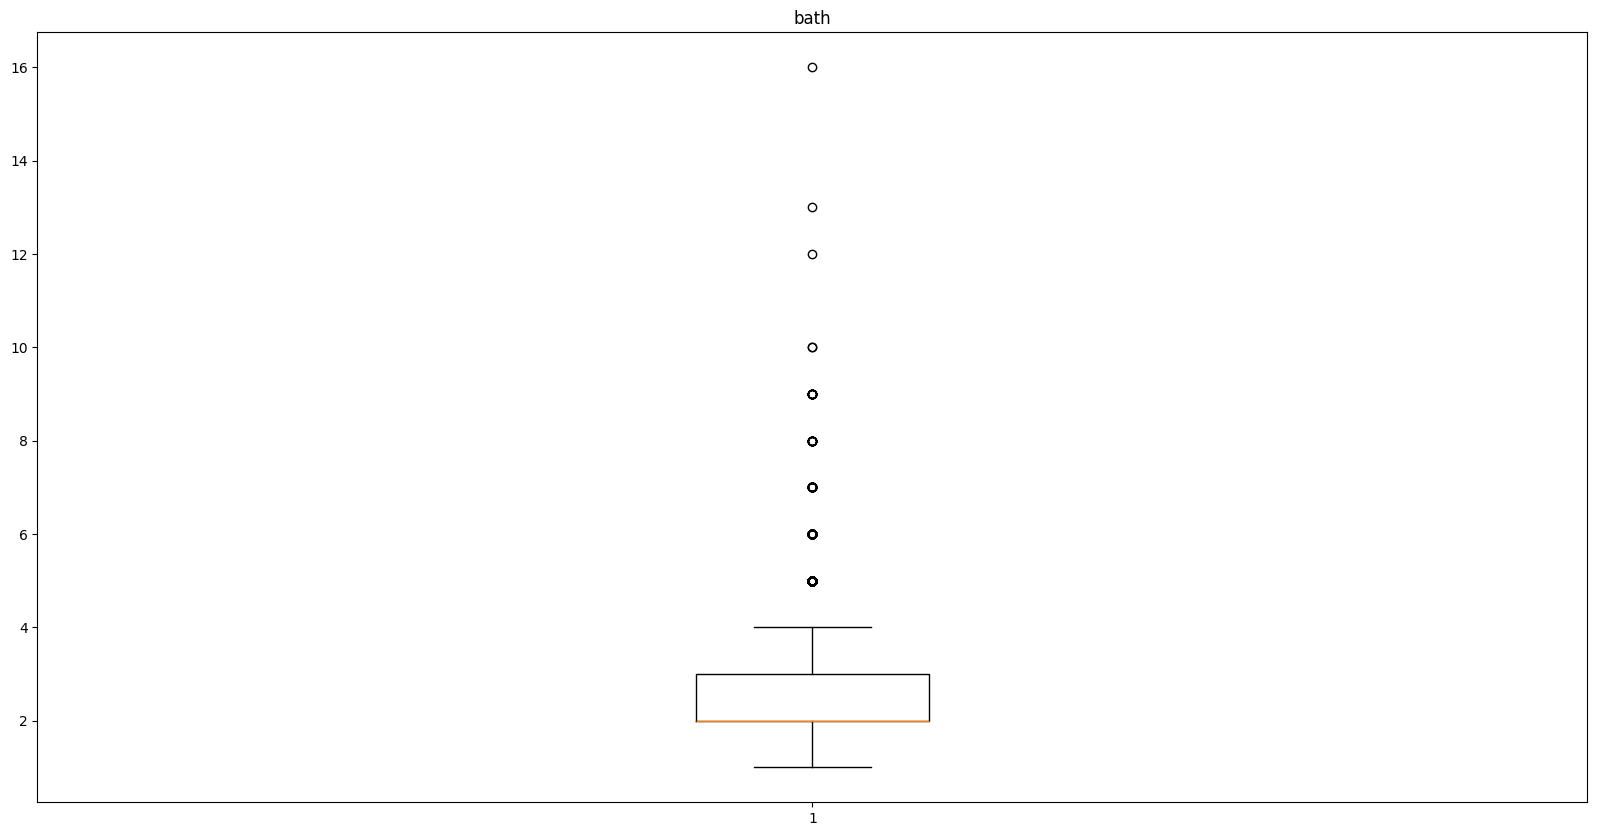

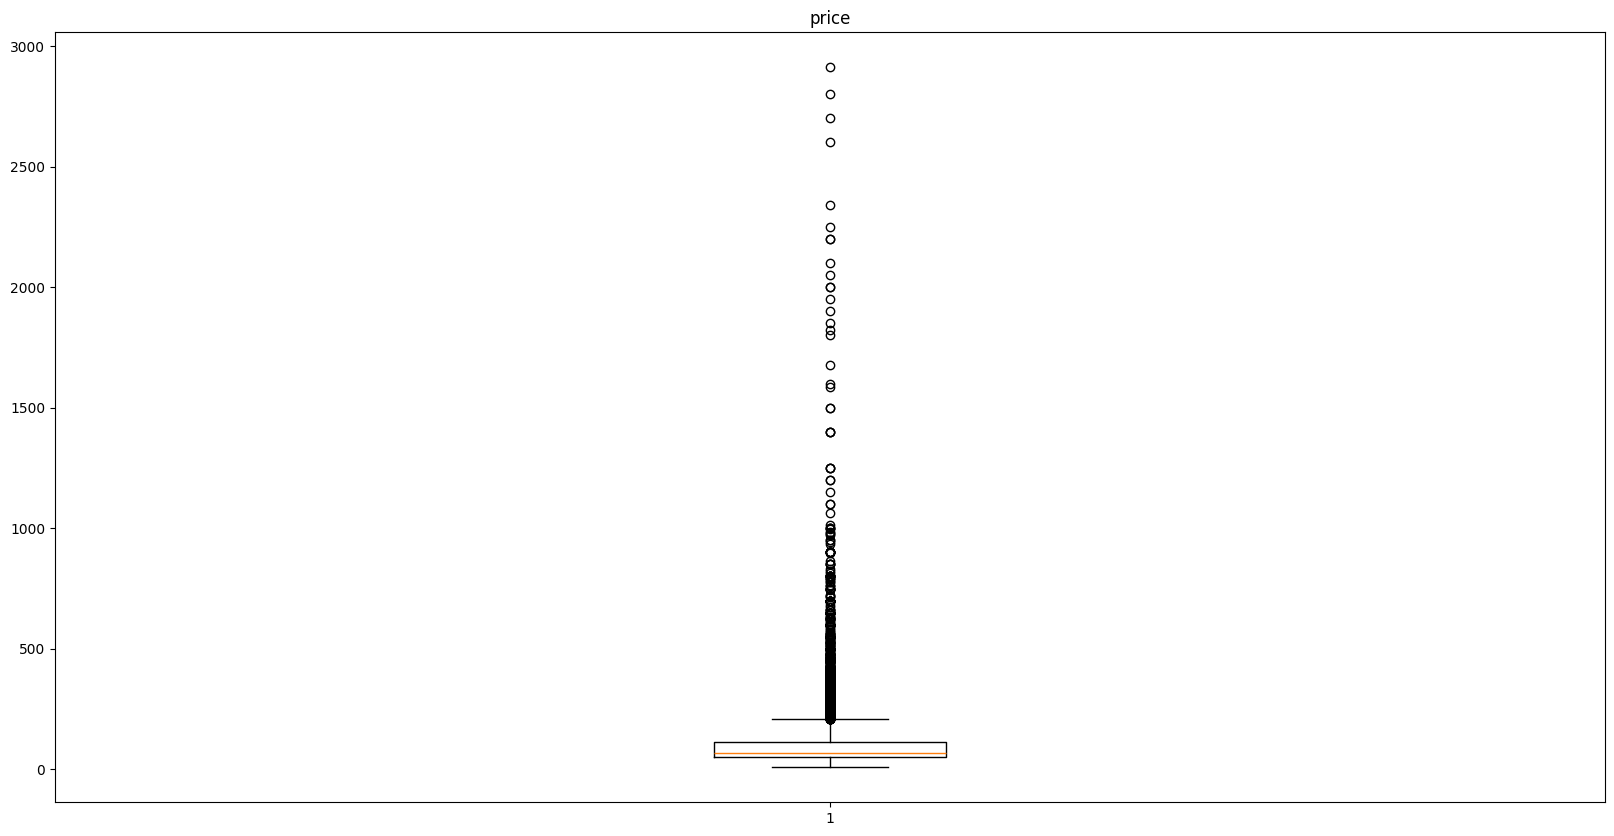

In [129]:
for i in df_num.columns:
    plt.boxplot(df_num[i])
    plt.title(i)
    plt.show()

In [130]:
df8.head()

,size,total_sqft,bath,price,bedroom,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [131]:
import seaborn as sns

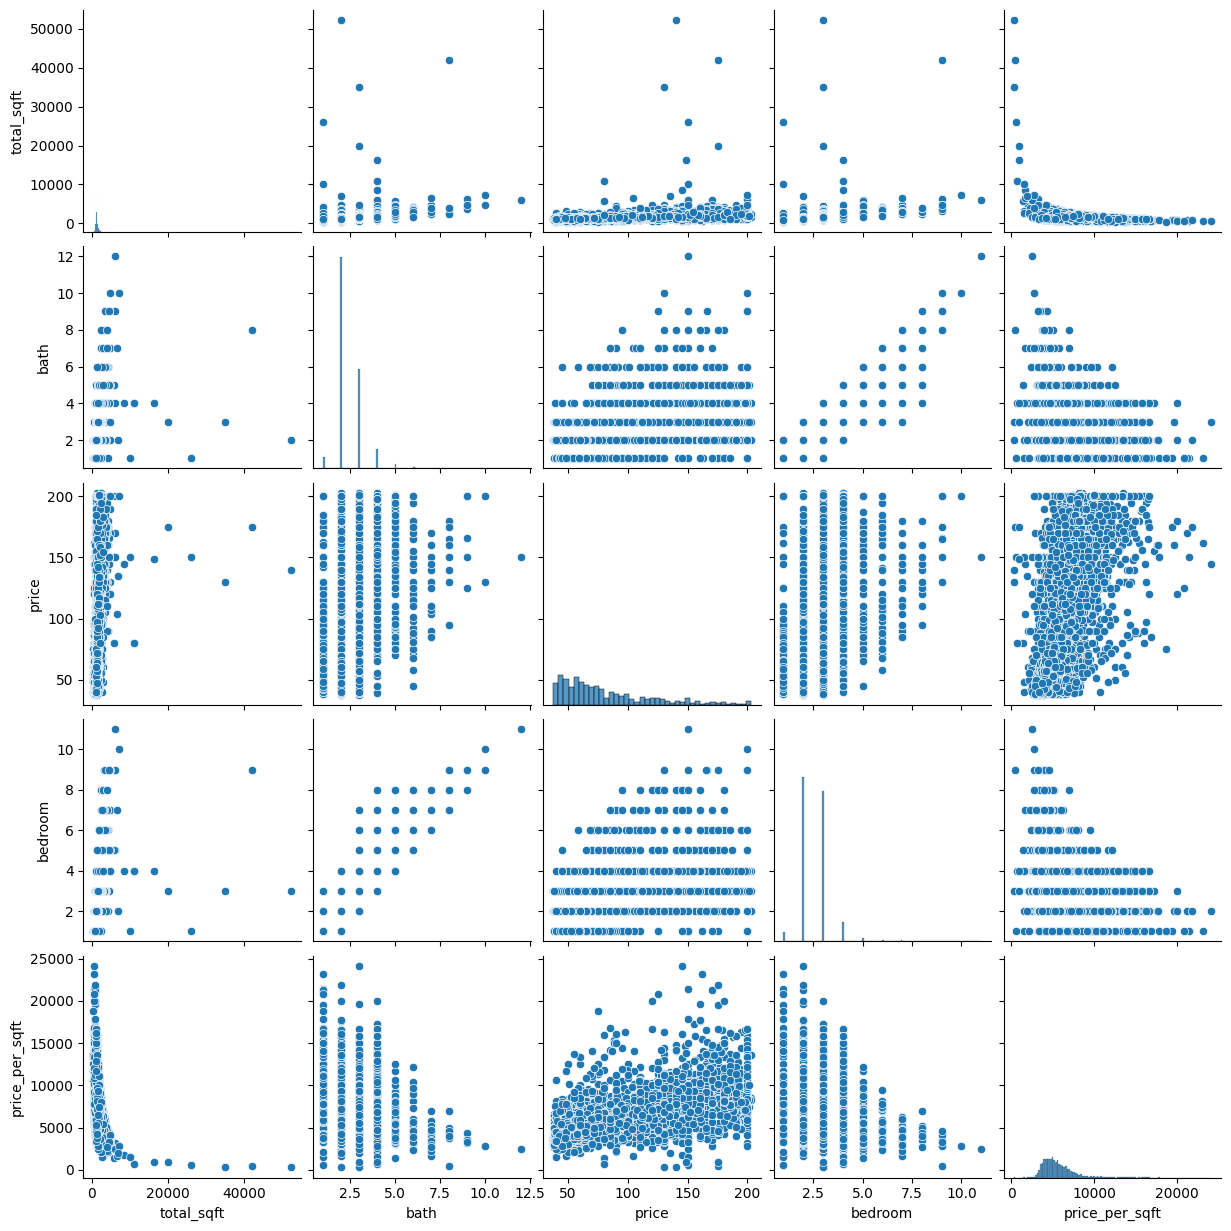

In [133]:
sns.pairplot(df8)

array([[<Axes: title={'center': 'price'}>]], dtype=object)

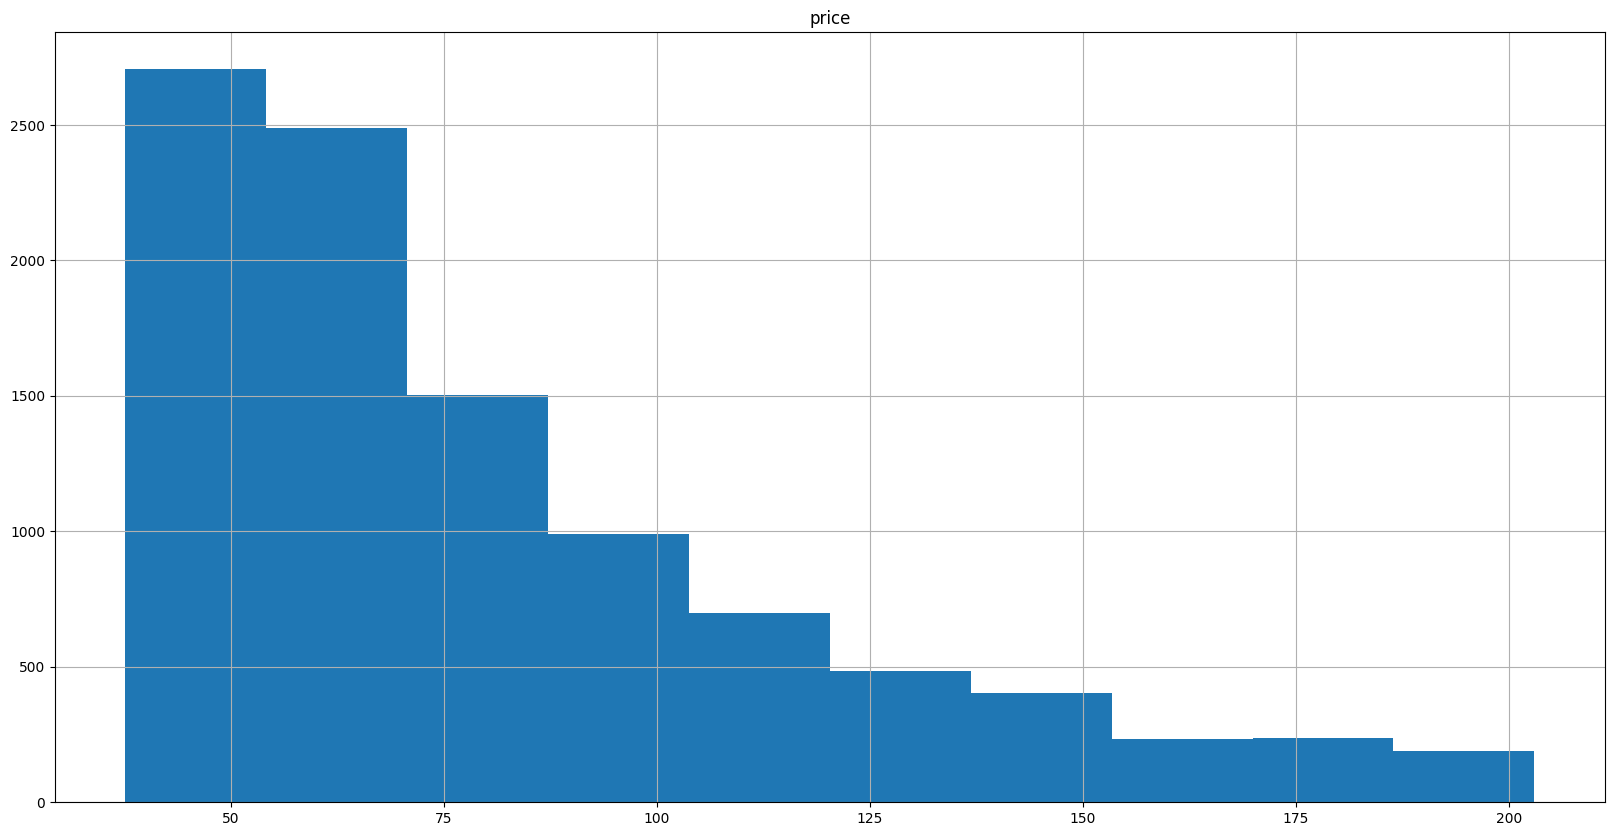

In [134]:
df8.hist("price")

In [135]:
df8.head()

,size,total_sqft,bath,price,bedroom,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [136]:
df8.isnull().sum()

size               0
total_sqft        31
bath               0
price              0
bedroom            0
price_per_sqft    31
dtype: int64

In [137]:
df9 = df8.dropna()

In [138]:
df9.isnull().sum()

size              0
total_sqft        0
bath              0
price             0
bedroom           0
price_per_sqft    0
dtype: int64

In [139]:
df9.shape

(9906, 6)

In [180]:
df5.isnull().sum()

size               0
total_sqft        46
bath               0
price              0
bedroom            0
price_per_sqft    46
dtype: int64

In [181]:
df10 = df5.copy()
df10 = df5.dropna()
df11 = df5.copy()

In [183]:
df11 = df5.dropna()

In [184]:
df11.isnull().sum()

size              0
total_sqft        0
bath              0
price             0
bedroom           0
price_per_sqft    0
dtype: int64

<Axes: ylabel='bedroom'>

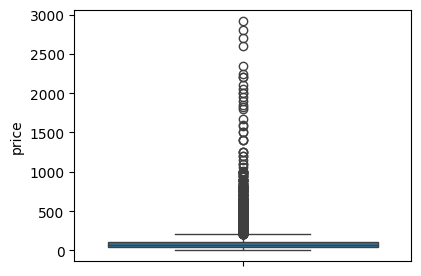

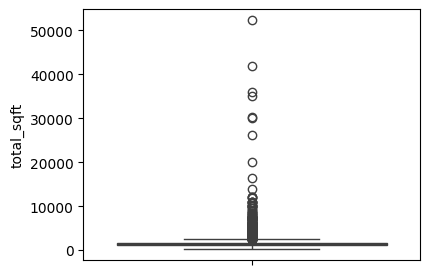

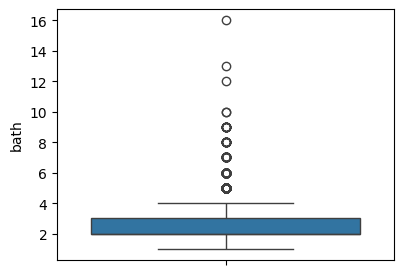

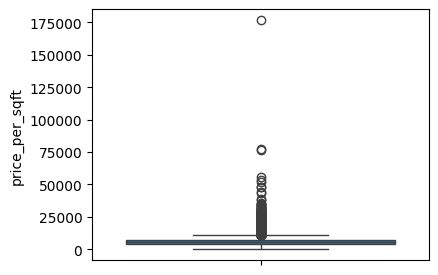

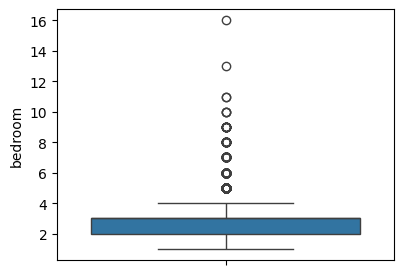

In [185]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(df11['price'])

plt.figure(figsize=(20,15))
plt.subplot(4,4,2)
sns.boxplot(df11['total_sqft'])

plt.figure(figsize=(20,15))
plt.subplot(4,4,3)
sns.boxplot(df11['bath'])

plt.figure(figsize=(20,15))
plt.subplot(4,4,4)
sns.boxplot(df11['price_per_sqft'])

plt.figure(figsize=(20,15))
plt.subplot(4,4,5)
sns.boxplot(df11['bedroom'])

In [186]:
df11['price'] = df11['price'].clip(lower=df11['price'].quantile(0.05), upper=df11['price'].quantile(0.95))
#df10['berdroom'] = df10['bedroom'].clip(lower=df10['bedroom'].quantile(0.05), upper=df10['bedroom'].quantile(0.95))
df11['total_sqft'] = df11['total_sqft'].clip(lower=df11['total_sqft'].quantile(0.05), upper=df11['total_sqft'].quantile(0.95))
#df10['bath'] = df10['bath'].clip(lower=df10['bath'].quantile(0.05), upper=df10['bath'].quantile(0.95))
df11['price_per_sqft'] = df11['price_per_sqft'].clip(lower=df11['price_per_sqft'].quantile(0.05), upper=df11['price_per_sqft'].quantile(0.95))

C:\Users\Manas\AppData\Local\Temp\ipykernel_27920\2508588902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['price'] = df11['price'].clip(lower=df11['price'].quantile(0.05), upper=df11['price'].quantile(0.95))
C:\Users\Manas\AppData\Local\Temp\ipykernel_27920\2508588902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['total_sqft'] = df11['total_sqft'].clip(lower=df11['total_sqft'].quantile(0.05), upper=df11['total_sqft'].quantile(0.95))
C:\Users\Manas\AppData\Local\Temp\ipykernel_27920\25

<Axes: ylabel='bedroom'>

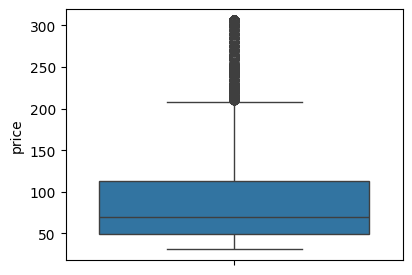

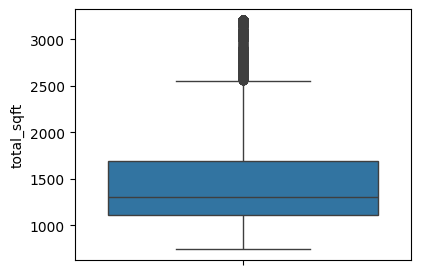

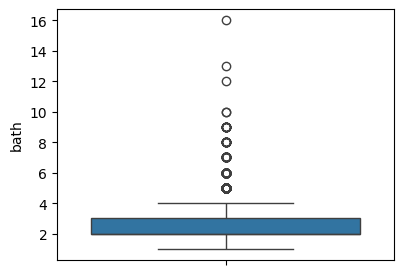

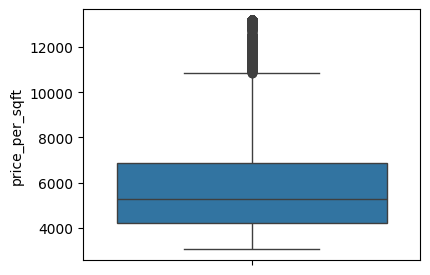

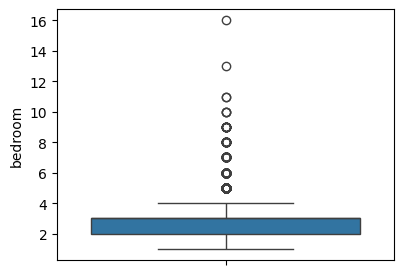

In [187]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(df11['price'])

plt.figure(figsize=(20,15))
plt.subplot(4,4,2)
sns.boxplot(df11['total_sqft'])

plt.figure(figsize=(20,15))
plt.subplot(4,4,3)
sns.boxplot(df11['bath'])

plt.figure(figsize=(20,15))
plt.subplot(4,4,4)
sns.boxplot(df11['price_per_sqft'])

plt.figure(figsize=(20,15))
plt.subplot(4,4,5)
sns.boxplot(df11['bedroom'])

In [188]:
df11.bath

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 12377, dtype: float64

In [189]:
df11['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 16., 10., 12., 13.])

In [205]:
X = df11[['total_sqft', 'bath','bedroom']]
y = df11.price

In [206]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [207]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6659575625906009

In [208]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.65248372, 0.66222452, 0.65349219, 0.67345756, 0.66453338])

In [ ]:
'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        }

In [209]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                 'fit_intercept':[True,False],
    
    'positive':[True,False], 
    'copy_X':[True,False],
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Manas\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Manas\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Manas\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Manas\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 638, in _validate_params
    validat

,model,best_score,best_params
0,linear_regression,0.661238,"{'copy_X': True, 'fit_intercept': True, 'posit..."
1,lasso,0.659682,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.668840,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
